# 03 - Data Cleaning

## Objectives

* Clean Missing Data

## Inputs

outputs/datasets/collection/house_prices_records.csv

## Outputs

Generate cleaned Train and Test sets, both saved under outputs/datasets/cleaned

## Additional Notes
### Data Cleaning - Imputation
##### Target: Missing Values
##### Used Strategies:
- Drop
- Mean
- Most Frequent

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/my-project-5/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/my-project-5'

# Load Data

# Data Exploration

In [4]:
import pandas as pd
dataset_raw_path = "outputs/datasets/collection/house_prices_records.csv"
dataset = pd.read_csv(dataset_raw_path)
dataset.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500


# Data Cleaning - Assessment

## Assessing Missing Data Levels

In [5]:
# Checking for missing values in Target Variable
if dataset['SalePrice'].isnull().any():
    print("The column 'SalePrice' has missing values.")
else:
    print("The column 'SalePrice' does not have any missing values.")

The column 'SalePrice' does not have any missing values.


### Custom function to display missing data levels in a DataFrames, it shows:
- Absolute levels
- Relative levels
- Data types

In [6]:
def EvaluateMissingData(dataset):
    missing_data_absolute = dataset.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(dataset)*100, 2)
    dataset_missing_data = (pd.DataFrame(
                            data={"RowsWithMissingData": missing_data_absolute,
                                   "PercentageOfDataset": missing_data_percentage,
                                   "DataType": dataset.dtypes}
                                    )
                          .sort_values(by=['PercentageOfDataset'], ascending=False)
                          .query("PercentageOfDataset > 0")
                          )

    return dataset_missing_data

Check missing data levels for the collected dataset.

In [7]:
EvaluateMissingData(dataset)

,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1324,90.68,float64
WoodDeckSF,1305,89.38,float64
LotFrontage,259,17.74,float64
GarageFinish,162,11.10,object
BsmtFinType1,114,7.81,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
MasVnrArea,8,0.55,float64


### Check Features with Missing Values

In [8]:
vars_with_missing_data = dataset.columns[dataset.isna().sum() > 0].to_list()
vars_with_missing_data

['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

# Data Cleaning - Imputations

#### Applied Imputations: 
- Dropped Variables: 2
- Numerical Variables: All
- Categorical Variables: All

## Imputations for Missing Values

#### Imputation 1) Drop Two Variables with approx. 90% missing values

In [9]:
variables_method = ['WoodDeckSF', 'EnclosedPorch' ]

print(f"* {len(variables_method)} features to drop \n\n"
    f"{variables_method}")

* 2 features to drop 

['WoodDeckSF', 'EnclosedPorch']


In [10]:
from feature_engine.selection import DropFeatures
from sklearn.impute import SimpleImputer
import pandas as pd

dataset.drop(["WoodDeckSF", "EnclosedPorch"], axis=1, inplace=True)

# Print statement to confirm if variables have been dropped
print("Variables 'WoodDeckSF' and 'EnclosedPorch' have been successfully dropped.")

# Check if missing values still exists
missing_values_dataset = dataset.isnull().sum()

if missing_values_dataset.sum() == 0:
    print("All missing values have been successfully imputed.")
else:
    print("There are still missing values in the raw dataset.")

Variables 'WoodDeckSF' and 'EnclosedPorch' have been successfully dropped.
There are still missing values in the raw dataset.


In [11]:
# Check missing values before imputation
EvaluateMissingData(dataset)

,RowsWithMissingData,PercentageOfDataset,DataType
LotFrontage,259,17.74,float64
GarageFinish,162,11.10,object
BsmtFinType1,114,7.81,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
MasVnrArea,8,0.55,float64


## Separate Target Variable from Dataset

In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Store the target variable in a separate variable
target_variable = dataset['SalePrice']

# Remove the 'SalePrice' column from the 'dataset' DataFrame
dataset = dataset.drop('SalePrice', axis=1)

# Check the columns in the dataset after removing 'SalePrice'
if 'SalePrice' not in dataset.columns:
    print("The 'SalePrice' column has been properly removed.")
else:
    print("The 'SalePrice' column is still present in the dataset.")

The 'SalePrice' column has been properly removed.


In [13]:
columns_list = list(dataset.columns)
for column in columns_list:
    print(column)

1stFlrSF
2ndFlrSF
BedroomAbvGr
BsmtExposure
BsmtFinSF1
BsmtFinType1
BsmtUnfSF
GarageArea
GarageFinish
GarageYrBlt
GrLivArea
KitchenQual
LotArea
LotFrontage
MasVnrArea
OpenPorchSF
OverallCond
OverallQual
TotalBsmtSF
YearBuilt
YearRemodAdd


#### Imputation 2) Remaining Variables

In [14]:
import pandas as pd
from sklearn.impute import SimpleImputer

# --> Separate numerical features
numerical_features = dataset.select_dtypes(include='number')

# Impute missing values for numerical features
numerical_imputer = SimpleImputer(strategy='mean')
numerical_features_imputed = pd.DataFrame(numerical_imputer.fit_transform(numerical_features), columns=numerical_features.columns)

# --> Separate categorical features
categorical_features = dataset.select_dtypes(include='object')

# Impute missing values for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_features_imputed = pd.DataFrame(categorical_imputer.fit_transform(categorical_features), columns=categorical_features.columns)

# Update original dataset with cleaned and imputed data
dataset = pd.concat([numerical_features_imputed, categorical_features_imputed], axis=1)

In [15]:
# Check missing values after imputation
EvaluateMissingData(dataset)

,RowsWithMissingData,PercentageOfDataset,DataType


In [16]:
# Check the columns in the dataset after removing 'SalePrice'
if 'SalePrice' not in dataset.columns:
    print("The 'SalePrice' column is still removed.")
else:
    print("The 'SalePrice' column has been added back to the dataset.")

The 'SalePrice' column is still removed.


In [17]:
# Add the 'SalePrice' column back to the dataset
dataset['SalePrice'] = target_variable

In [18]:
# Check the columns in the dataset after removing 'SalePrice'
if 'SalePrice' not in dataset.columns:
    print("The 'SalePrice' column has been properly removed.")
else:
    print("The 'SalePrice' column has been added back to the dataset.")

The 'SalePrice' column has been added back to the dataset.


In [19]:
# Check if missing values still exists
missing_values_dataset = dataset.isnull().sum()

if missing_values_dataset.sum() == 0:
    print("All missing values have been successfully imputed.")
else:
    print("There are still missing values in the raw dataset.")

All missing values have been successfully imputed.


# Explore Skewness in Raw Dataset

## Define Variables - Numerical

In [20]:
# 1)
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print('Amount of Numerical Features: ', len(numerical_features))

# 2)
year_feature_in_numerical_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
print("Amount of Temporal (Year) Features: {}".format(len(year_feature_in_numerical_features)))

# 3)
discrete_in_numerical_features=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature_in_numerical_features]
print("Amount of Discrete Features: {}".format(len(discrete_in_numerical_features)))

Amount of Numerical Features:  18
Amount of Temporal (Year) Features: 3
Amount of Discrete Features: 3


## Define Variables - Continuous Features 

In [21]:
cont_features =[feature for feature in numerical_features if feature not in discrete_in_numerical_features+year_feature_in_numerical_features]

print("Amount of Continuous Features in Raw Dataset: {}".format(len(cont_features)))
print("Continuous Features in Raw Dataset: ", cont_features)

Amount of Continuous Features in Raw Dataset: 12
Continuous Features in Raw Dataset:  ['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'GrLivArea', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'TotalBsmtSF', 'SalePrice']


### Check Skewness - Before

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

skewness_before = dataset[cont_features].skew()

# Print skewness before transformation
print("Skewness before log transformation:")
for feature, skewness in zip(cont_features, skewness_before):
    print(f"{feature}: {skewness:.4f}")

Skewness before log transformation:
1stFlrSF: 1.3768
2ndFlrSF: 0.8402
BsmtFinSF1: 1.6855
BsmtUnfSF: 0.9203
GarageArea: 0.1800
GrLivArea: 1.3666
LotArea: 12.2077
LotFrontage: 2.3850
MasVnrArea: 2.6764
OpenPorchSF: 2.3643
TotalBsmtSF: 1.5243
SalePrice: 1.8829


# Normalize Distribution
## Applied Technique: Logarithmic Transformation

- Is applied to Feature Type: Numerical - Continuous 
- Purpose: To handle skewness


### APPLY: Log Transform on Raw Dataset

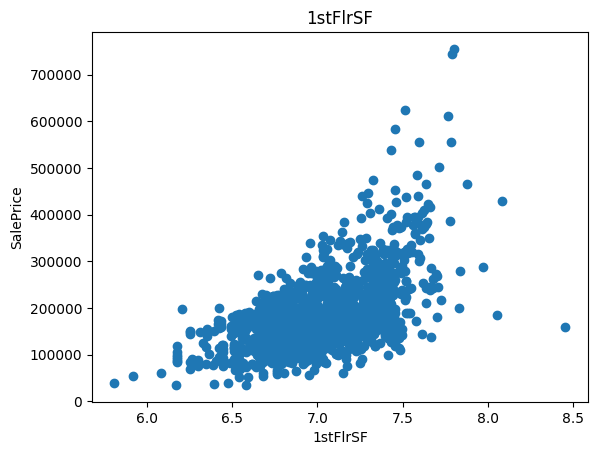

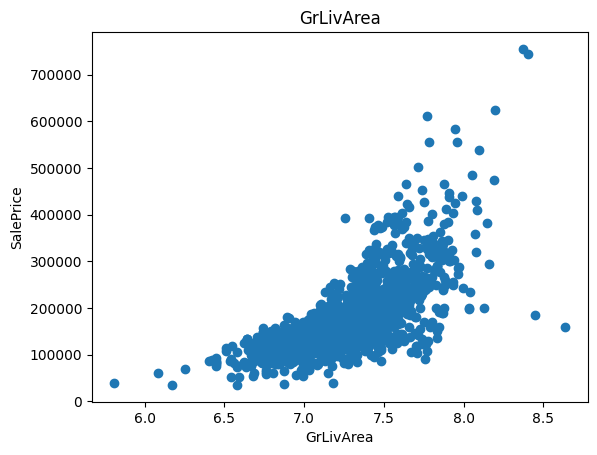

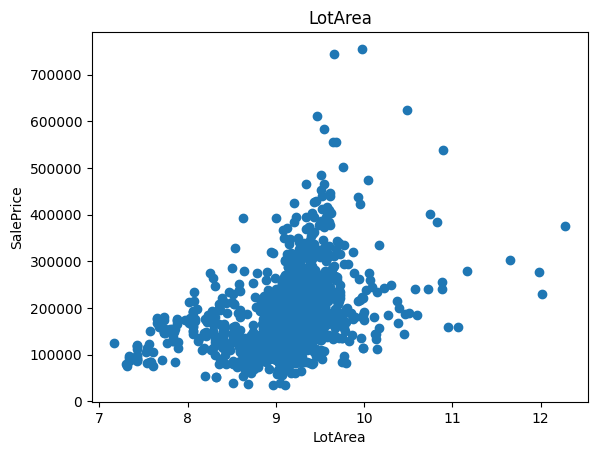

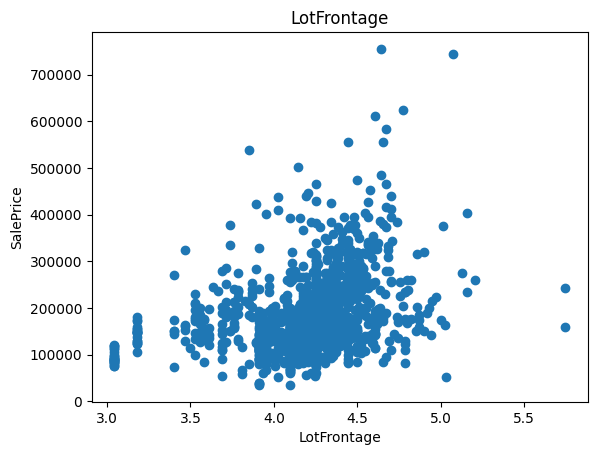

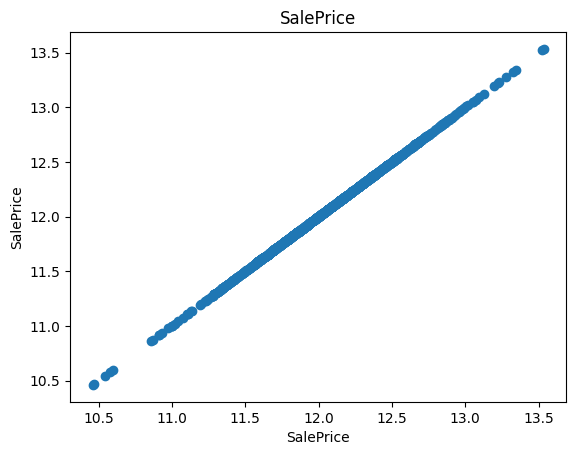

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Log-Normal Transformation
for feature in cont_features:
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        plt.scatter(dataset[feature], dataset['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

skewness_after = dataset[cont_features].skew()

# Print skewness after transformation
print("Skewness after log transformation:")
for feature, skewness in zip(cont_features, skewness_after):
    print(f"{feature}: {skewness:.4f}")

Skewness after log transformation:
1stFlrSF: 0.0792
2ndFlrSF: 0.8402
BsmtFinSF1: 1.6855
BsmtUnfSF: 0.9203
GarageArea: 0.1800
GrLivArea: -0.0070
LotArea: -0.1380
LotFrontage: -0.9308
MasVnrArea: 2.6764
OpenPorchSF: 2.3643
TotalBsmtSF: 1.5243
SalePrice: 0.1213


# Correlation and PPS Analysis

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(dataset, threshold, figsize=(20, 12), font_annot=8):
    if len(dataset.columns) > 1:
        mask = np.zeros_like(dataset, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(dataset) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(dataset, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(dataset.columns, rotation=0)
        plt.ylim(len(dataset.columns), 0)
        plt.show()


def heatmap_pps(dataset, threshold, figsize=(20, 12), font_annot=8):
    if len(dataset.columns) > 1:
        mask = np.zeros_like(dataset, dtype=np.bool)
        mask[abs(dataset) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(dataset, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(dataset.columns), 0)
        plt.show()


def CalculateCorrAndPPS(dataset):
    dataset_corr_spearman = dataset.corr(method="spearman")
    dataset_corr_pearson = dataset.corr(method="pearson")

    pps_matrix_raw = pps.matrix(dataset)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return dataset_corr_pearson, dataset_corr_spearman, pps_matrix


def DisplayCorrAndPPS(dataset_corr_pearson, dataset_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(dataset=dataset_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(dataset=dataset_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(dataset=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

#### Calculate Correlations and Power Predictive Score

In [26]:
dataset_corr_pearson, dataset_corr_spearman, pps_matrix = CalculateCorrAndPPS(dataset)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%    50%    75%    max
ppscore  462.0  0.065  0.106  0.0  0.0  0.005  0.091  0.629


Display at Heatmaps



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



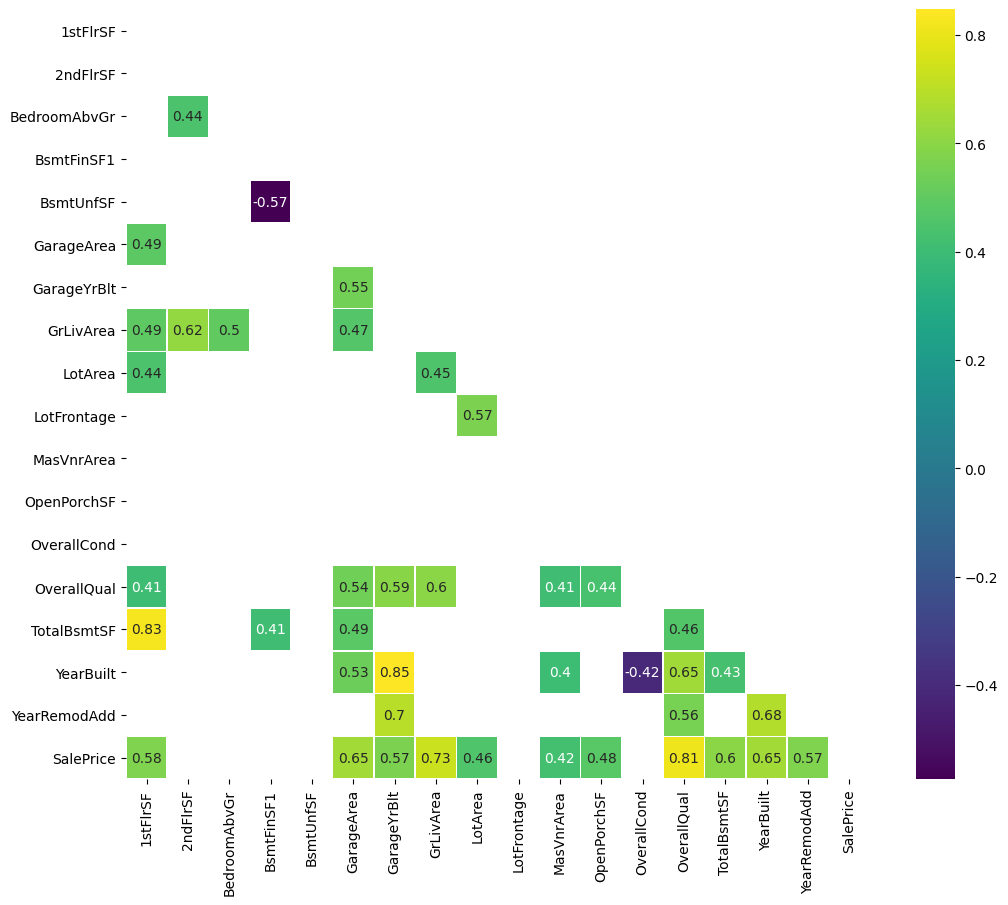



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



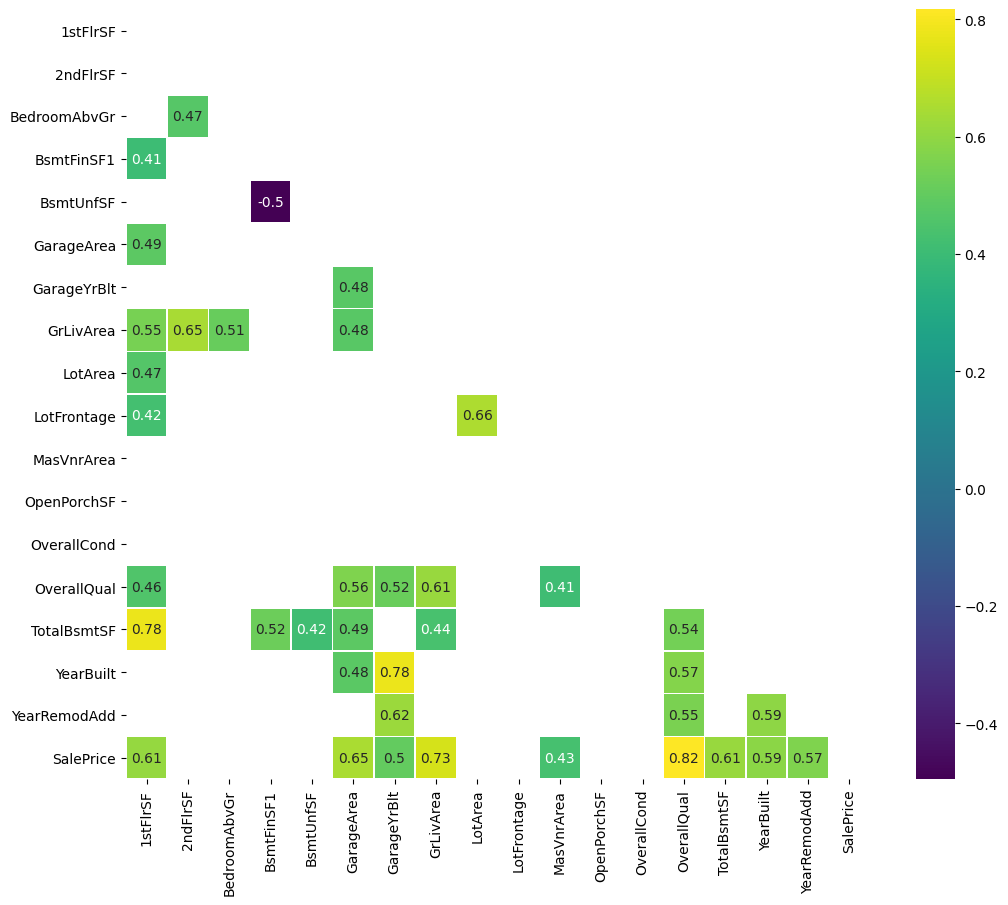



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



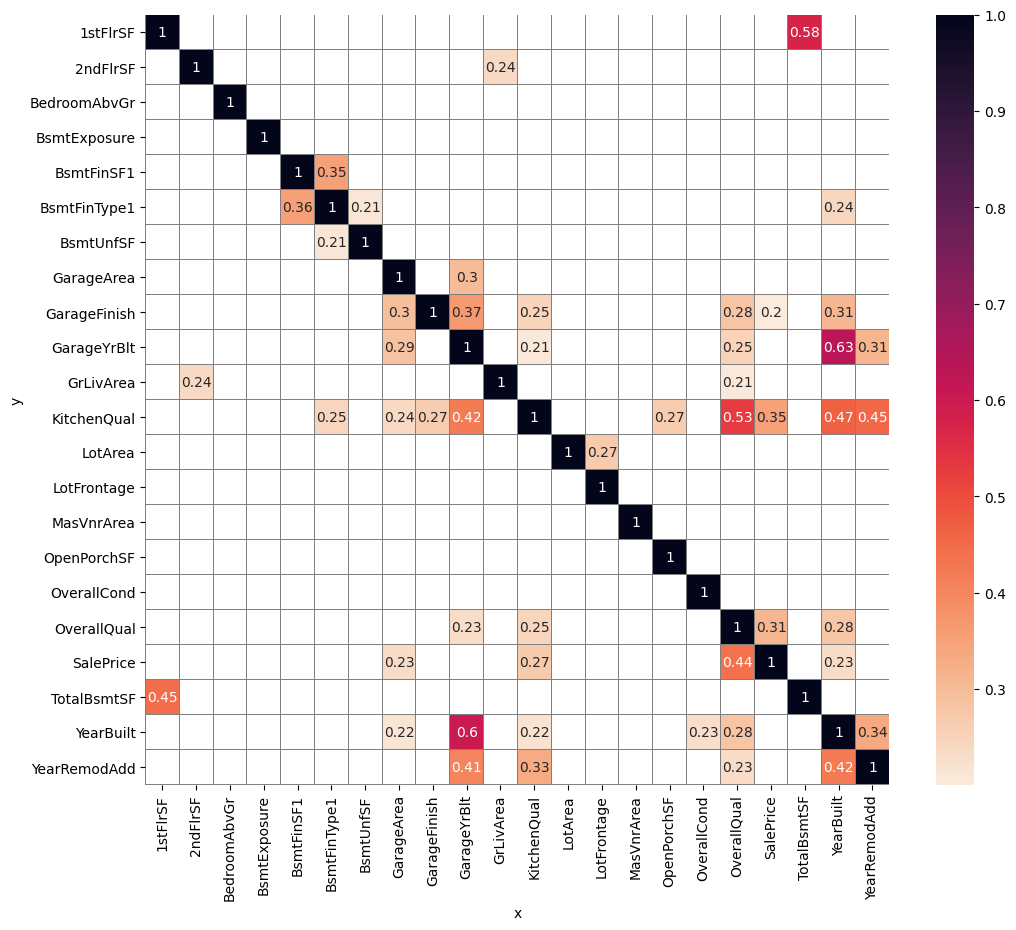

In [27]:
DisplayCorrAndPPS(dataset_corr_pearson = dataset_corr_pearson,
                  dataset_corr_spearman = dataset_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=10)

In [28]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df=dataset, minimal=True)
profile.to_file("data_cleaning_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Split Train and Test Set

In [29]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        dataset,
                                        dataset['SalePrice'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1168, 22) 
TestSet shape: (292, 22)


## Check the new sets 

In [35]:
TrainSet.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,...,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,BsmtExposure,BsmtFinType1,GarageFinish,KitchenQual,SalePrice
618,7.510978,0.0,2.869214,48.0,1774.0,774.0,2007.0,7.510978,9.366831,4.499810,...,5.0,9.0,1822.0,2007.0,2007.0,Av,Unf,Unf,Gd,12.659734
870,6.795706,0.0,2.000000,0.0,894.0,308.0,1962.0,6.795706,8.794825,4.094345,...,5.0,5.0,894.0,1962.0,1962.0,No,Unf,Unf,TA,11.603680
92,6.871091,0.0,2.000000,713.0,163.0,432.0,1921.0,6.871091,9.500020,4.382027,...,7.0,5.0,876.0,1921.0,2006.0,No,ALQ,Unf,TA,12.004568


In [36]:
TestSet.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,...,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,BsmtExposure,BsmtFinType1,GarageFinish,KitchenQual,SalePrice
529,7.830028,0.0,4.0,1219.0,816.0,484.0,1975.0,7.830028,10.394151,4.249209,...,3.0,6.0,2035.0,1957.0,1975.0,No,Rec,Unf,TA,12.209188
491,6.864848,620.0,3.0,403.0,238.0,240.0,1941.0,7.363914,9.157994,4.369448,...,7.0,6.0,806.0,1941.0,1950.0,No,BLQ,Unf,Fa,11.798104
459,6.886532,224.0,3.0,185.0,524.0,352.0,1950.0,7.092574,8.855806,4.249209,...,4.0,5.0,709.0,1950.0,1950.0,No,LwQ,Unf,Gd,11.608236


In [37]:
EvaluateMissingData(TrainSet)

,RowsWithMissingData,PercentageOfDataset,DataType


In [38]:
EvaluateMissingData(TestSet)

,RowsWithMissingData,PercentageOfDataset,DataType


# Save the TrainSet and TestSet

In [39]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
  print(e)

# Save TrainSet
TrainSet.to_csv("outputs/datasets/cleaned/train_set.csv", index=False)

# Save TestSet
TestSet.to_csv("outputs/datasets/cleaned/test_set.csv", index=False)